# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
counter = 0
sets = 1

units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Create lists
city1 = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
maxTemp = []
windSpeed = []

counter = 0
sets = 1

# Loop through to create dataframe columns
print("Beginning Data Retrieval\n------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        if counter > 48:
            counter = 1
            sets += 1
            city1.append(city)
        else:
            counter += 1
            city1.append(city)
        print(f"Processing Record {counter} of Set {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | haicheng
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sabha
Processing Record 11 of Set 1 | jalu
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | mataura
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | phangnga
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | jackson
Processing Record 20 of Set 1 | novopavlovka
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | xiazhen
Processing Record 23 of 

Processing Record 41 of Set 4 | stokmarknes
Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | tromso
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | belluno
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | nurota
City not found. Skipping...
Processing Record 1 of Set 5 | caravelas
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | trairi
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | bitung
City not found. Skipping...
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | carlisle
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | venice
Processing Record 11 of Set 5 | atar
Processing Record 12 of Set 5 | maragogi
City not found. Skipping...
Processing 

Processing Record 28 of Set 8 | mogadishu
City not found. Skipping...
Processing Record 29 of Set 8 | zhoucheng
Processing Record 30 of Set 8 | sur
Processing Record 31 of Set 8 | ende
Processing Record 32 of Set 8 | dauphin
City not found. Skipping...
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | darnah
Processing Record 35 of Set 8 | waipawa
Processing Record 36 of Set 8 | erenhot
Processing Record 37 of Set 8 | lashio
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | alekseyevsk
City not found. Skipping...
Processing Record 40 of Set 8 | oranjestad
Processing Record 41 of Set 8 | kharan
Processing Record 42 of Set 8 | manbij
Processing Record 43 of Set 8 | beloha
City not found. Skipping...
Processing Record 44 of Set 8 | carnarvon
Processing Record 45 of Set 8 | iwanai
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | batagay-alyta
Processing Record 48 of Set 8 | chute-aux-outardes
Processing Record 49 of Set 8

Processing Record 6 of Set 12 | shahreza
Processing Record 7 of Set 12 | aykhal
Processing Record 8 of Set 12 | santa cruz de tenerife
Processing Record 9 of Set 12 | yanzhou
Processing Record 10 of Set 12 | poopo
Processing Record 11 of Set 12 | tura
Processing Record 12 of Set 12 | geraldton
Processing Record 13 of Set 12 | eganville
Processing Record 14 of Set 12 | kaputa
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 12 | panjab
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#create data frame names using list names
dfNames = {
    "City": city1,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed
}

In [21]:
# Create data frame 
weather_df = pd.DataFrame(dfNames)

In [22]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)

In [23]:
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [24]:
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,richards bay,90,US,1569909197,93,46.84,-95.91,46.40,12.75
1,cape town,0,CL,1569909197,100,-36.41,-71.90,39.20,4.70
2,haicheng,0,CN,1569909198,37,40.85,122.74,84.29,14.18
3,punta arenas,75,PH,1569909199,74,14.18,121.12,89.01,13.87
4,norman wells,1,US,1569909087,74,35.22,-97.44,79.00,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

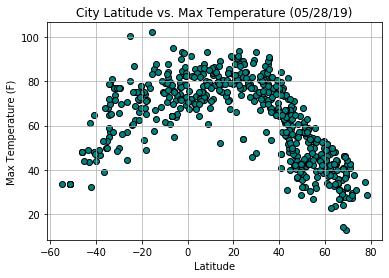

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="teal")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (alpha=25)
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

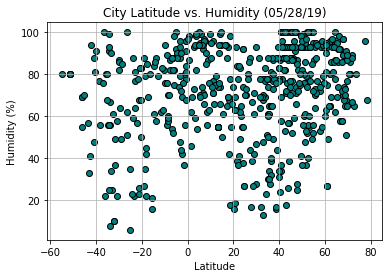

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="teal")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (alpha=25)
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

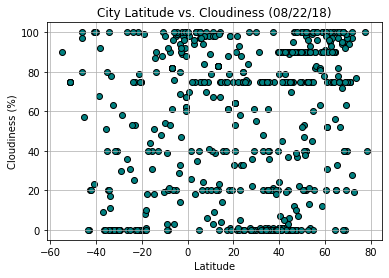

In [27]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="teal")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (alpha=25)
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

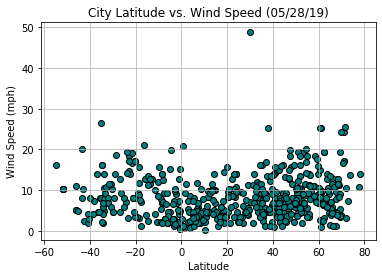

In [28]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="teal")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (alpha=25)
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


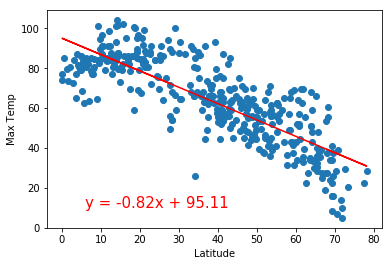

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


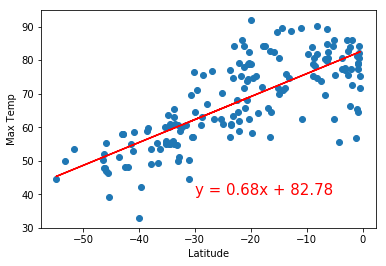

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


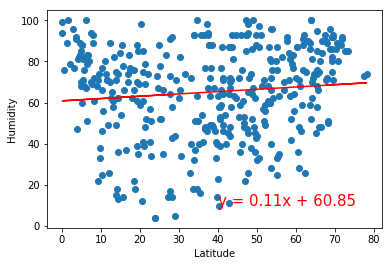

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


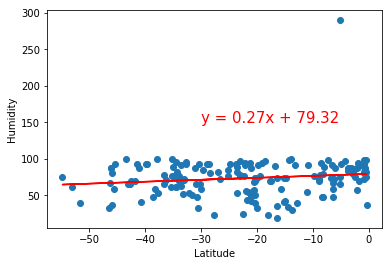

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


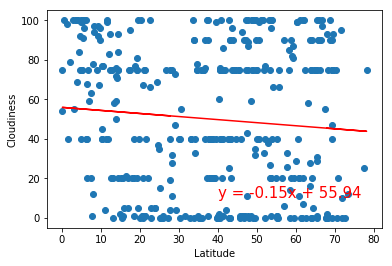

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


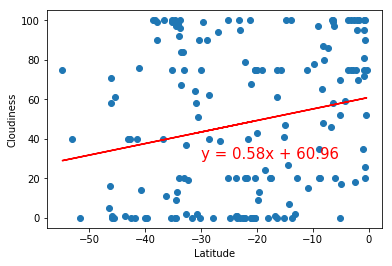

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


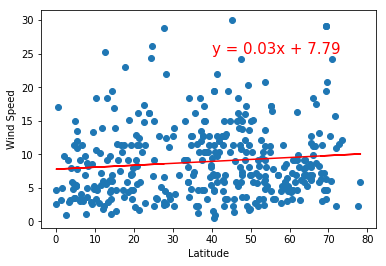

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


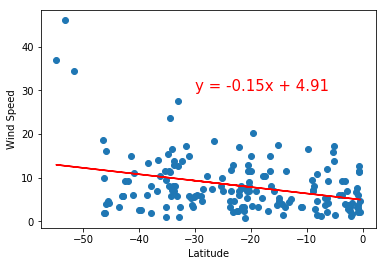